# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

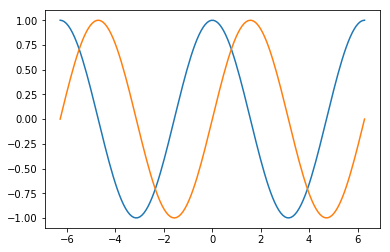

In [9]:
X = np.linspace(-2*np.pi, 2*np.pi, 150)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


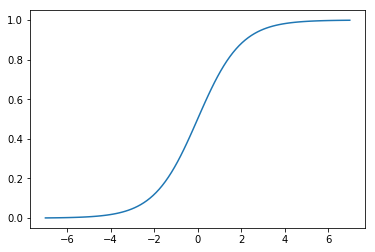

In [18]:
X = np.linspace(-7,7, 100)

Y = np.exp(X) / (1 + np.exp(X))

plt.plot(X, Y)

### Scatter plots

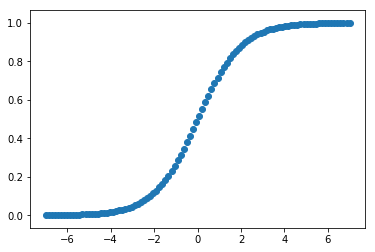

In [20]:
plt.scatter(X, Y)

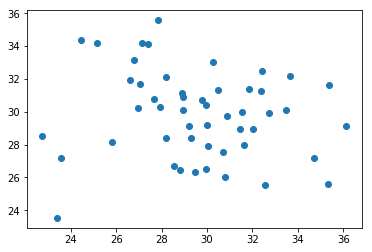

In [26]:
X = np.random.randn(50) * 3 + 30

Y = np.random.randn(50) * 3 + 30

plt.scatter(X, Y)

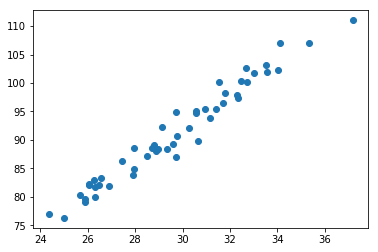

In [42]:
X = np.random.randn(50) * 3 + 30

Y = 3 * X + 2

jitter = np.random.randn(50) * 2


plt.scatter(X, Y + jitter)

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


This is what happens if you make a line plot of unsorted data:

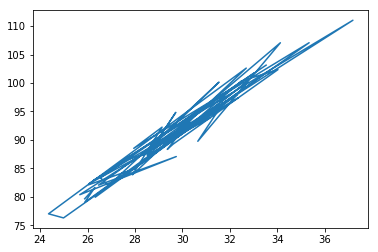

In [47]:
plt.plot(X, Y + jitter)

In [48]:
list(zip(X, Y + jitter))[:5]

[(25.882015333530788, 79.677474131541842),
 (26.307723169258942, 81.653115877639138),
 (25.883321008943735, 79.053340647320127),
 (28.962813908812635, 88.353324212606395),
 (32.354643109330162, 97.416109003324493)]

### Bar plots

Do not confuse with histograms

<Container object of 4 artists>

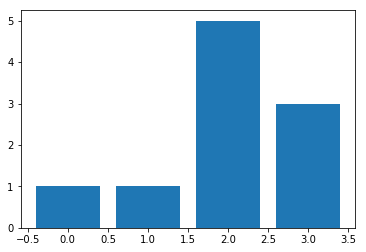

In [50]:
X = range(4)
Y = [1, 1, 5, 3]

plt.bar(X, Y)

([<matplotlib.axis.XTick at 0x7fb8c6e70860>,
 <a list of 4 Text xticklabel objects>)

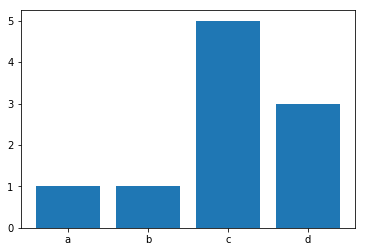

In [52]:
X = range(4)
Y = [1, 1, 5, 3]

plt.bar(X, Y)
plt.xticks(X, list('abcd'))

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

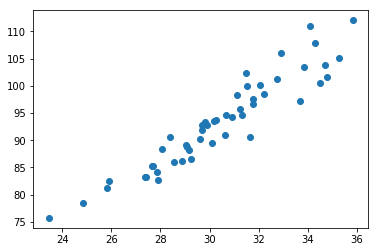

In [56]:
X = np.random.randn(50) * 3 + 30

Y = 3 * X + 2 + np.random.randn(50) * 2
plt.scatter(X, Y)

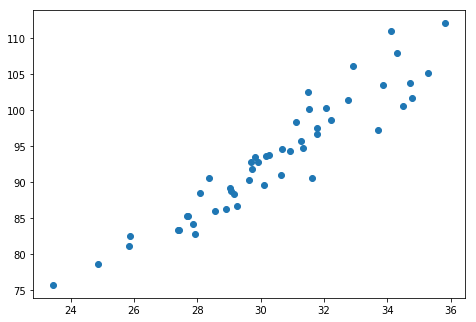

In [65]:
f = plt.figure()

axes = f.add_axes([0, 0, 1, 1])

axes.scatter(X,Y)

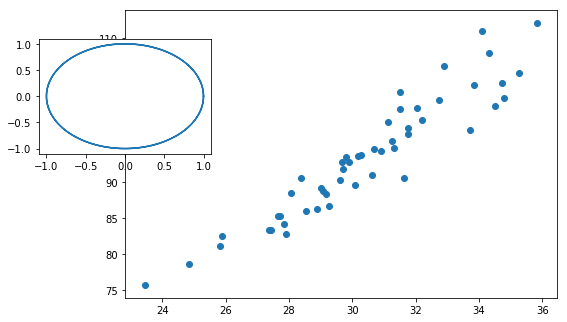

In [69]:
f = plt.figure()

axes1 = f.add_axes([0.2, 0, 1, 1])
axes1.scatter(X,Y)

axes2 = f.add_axes([0, .5, .4, .4])
axes2.plot(C, S)

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

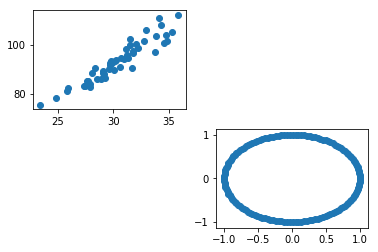

In [74]:
f = plt.figure()

axes1 = f.add_subplot(2, 2, 1)
axes1.scatter(X, Y)

axes2 = f.add_subplot(2, 2, 4)
axes2.scatter(C, S)

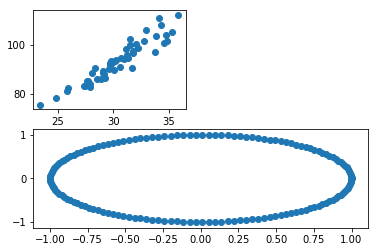

In [77]:
f = plt.figure()

axes1 = f.add_subplot(2, 2, 1)
axes1.scatter(X, Y)

axes2 = f.add_subplot(2, 1, 2)
axes2.scatter(C, S)

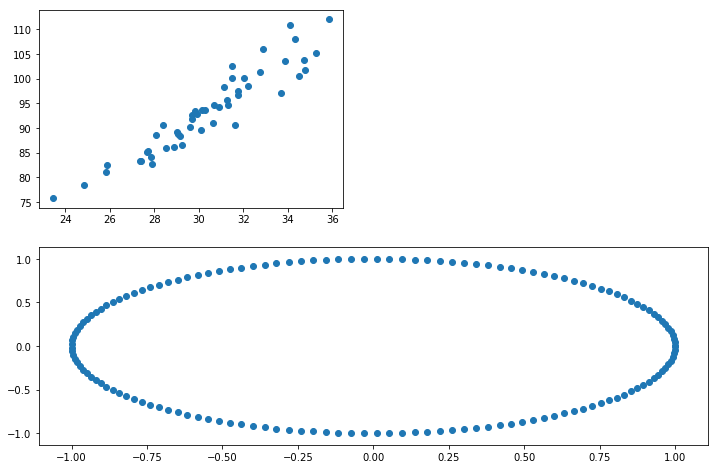

In [78]:
f = plt.figure()

axes1 = f.add_subplot(2, 2, 1)
axes1.scatter(X, Y)

axes2 = f.add_subplot(2, 1, 2)
axes2.scatter(C, S)

f.set_size_inches(12, 8)

### `figure.subplots()`

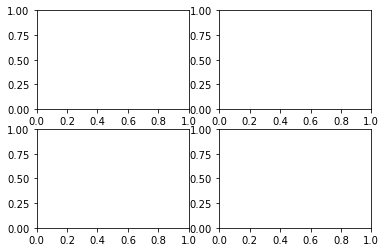

In [79]:
f, axeses = plt.subplots(2, 2) 

In [82]:
type(axeses)

numpy.ndarray

In [85]:
axeses[0,:]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8c5c9a780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8c5cd2278>], dtype=object)

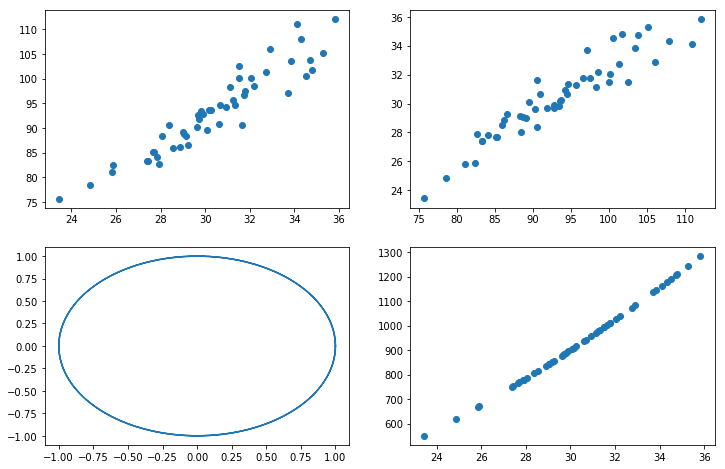

In [89]:
f, axeses = plt.subplots(2, 2) 
f.set_size_inches(12, 8)

axeses[0,0].scatter(X, Y)
axeses[0,1].scatter(Y, X)
axeses[1,0].plot(C, S)
axeses[1,1].scatter(X, X ** 2)

f.savefig('example.pdf')

### Sharing axis

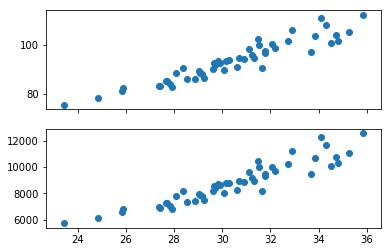

In [90]:
f, axeses = plt.subplots(2,1, sharex=True)

axeses[0].scatter(X, Y)
axeses[1].scatter(X, Y ** 2)

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

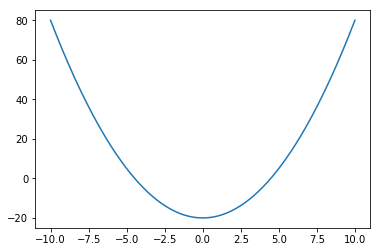

In [107]:
X2 = np.linspace(-10, 10, 200)
Y2 = X2 ** 2 - 20
Y3 = X2 ** 3

plt.plot(X2, Y2)

In [ ]:
plt.fill_between?

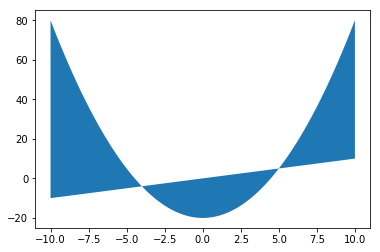

In [106]:
plt.fill_between(X2, X2, Y2)

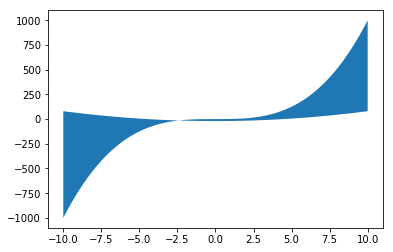

In [110]:
plt.fill_between(X2, Y2, Y3)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

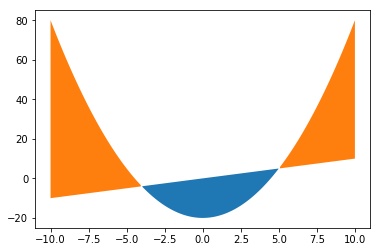

In [112]:
plt.fill_between(X2, X2, Y2, where= X2 > Y2)
plt.fill_between(X2, X2, Y2, where= X2 < Y2)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



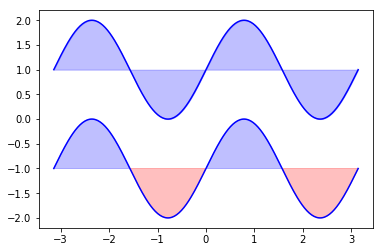

In [123]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)

plt.fill_between(X, Y+1, 1, color='blue', alpha=.25)


plt.fill_between(X, Y-1, -1, color='blue', where= Y - 1 > -1, alpha=.25)
plt.fill_between(X, Y-1, -1, color='red', where= Y - 1 < -1, alpha=.25)



plt.show()

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

array([ 0.        ,  0.25641026,  0.51282051,  0.76923077,  1.02564103,
        1.28205128,  1.53846154,  1.79487179,  2.05128205,  2.30769231,
        2.56410256,  2.82051282,  3.07692308,  3.33333333,  3.58974359,
        3.84615385,  4.1025641 ,  4.35897436,  4.61538462,  4.87179487,
        0.12820513,  0.38461538,  0.64102564,  0.8974359 ,  1.15384615,
        1.41025641,  1.66666667,  1.92307692,  2.17948718,  2.43589744,
        2.69230769,  2.94871795,  3.20512821,  3.46153846,  3.71794872,
        3.97435897,  4.23076923,  4.48717949,  4.74358974,  0.        ])

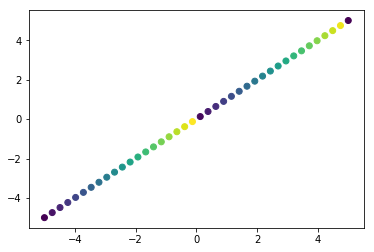

In [133]:
X = np.linspace(-5,5, 40)

plt.scatter(X, X, c = X % 5)

X % 5

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

### Markers and linestyles

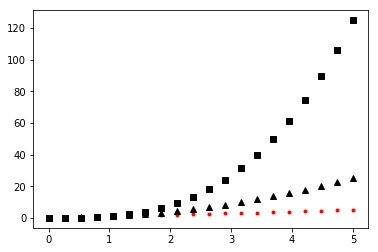

In [147]:
X = np.linspace(0, 5, 20)

Y1 = X
Y2 = X ** 2
Y3 = X ** 3

f, axes = plt.subplots(1,1)

axes.plot(X, Y1, 'r.')
axes.plot(X, Y2, 'k^')
axes.plot(X, Y3, 'ks')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

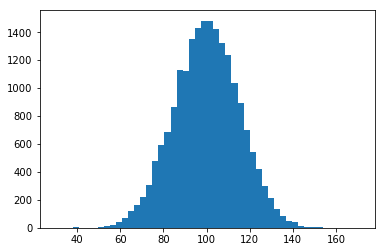

In [153]:
mu, sigma = 100, 15

iq = np.random.randn(20000) * 15 + 100

plt.hist(iq, 50);


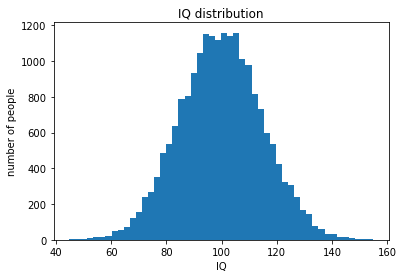

In [155]:
mu, sigma = 100, 15

iq = np.random.randn(20000) * 15 + 100

plt.hist(iq, 50);

plt.title('IQ distribution')
plt.ylabel('number of people')
plt.xlabel('IQ')


## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

$$f(x) = \frac{1}{e ^ x}$$

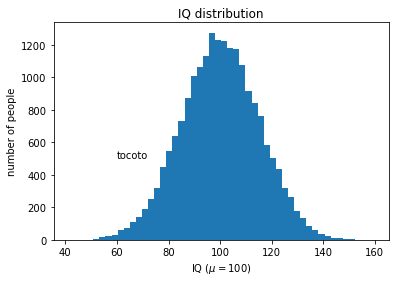

In [159]:
mu, sigma = 100, 15

iq = np.random.randn(20000) * 15 + 100

plt.hist(iq, 50);

plt.title('IQ distribution')
plt.ylabel('number of people')
plt.xlabel('IQ ($\mu = 100$)')

plt.text(60, 500, 'tocoto')


## Legends

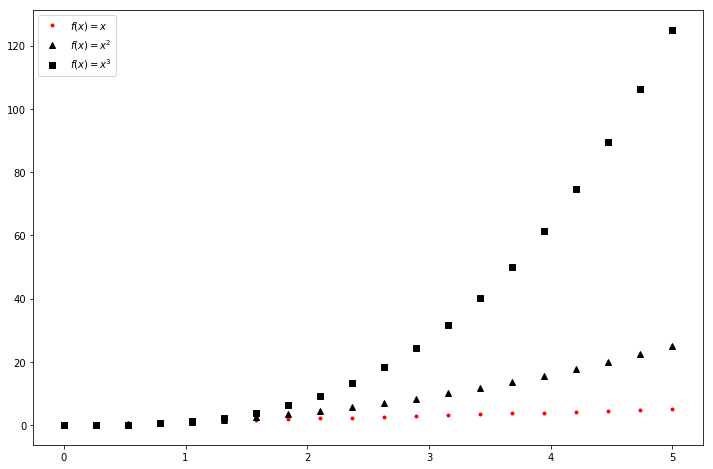

In [162]:
X = np.linspace(0, 5, 20)

Y1 = X
Y2 = X ** 2
Y3 = X ** 3

f, axes = plt.subplots(1,1)
f.set_size_inches(12, 8)

axes.plot(X, Y1, 'r.', label='$f(x) = x$')
axes.plot(X, Y2, 'k^', label='$f(x) = x ^ 2$')
axes.plot(X, Y3, 'ks', label='$f(x) = x ^ 3$')

plt.legend()

## Ticks, tick labels, limits

### Ticks

(-1, 5)

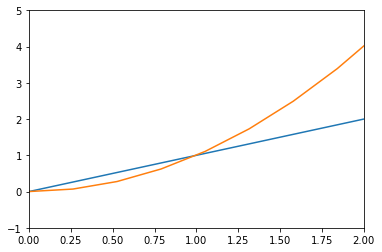

In [168]:
f, ax = plt.subplots(1, 1)

X = np.linspace(0, 5, 20)

Y1 = X
Y2 = X ** 2

ax.plot(X, Y1)
ax.plot(X, Y2)

ax.set_xlim(0, 2)
ax.set_ylim(-1, 5)

### Tick labels

### Limits

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

In [169]:
import seaborn as sns

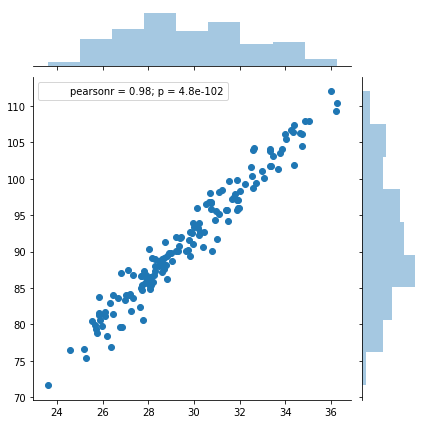

In [171]:
X = np.random.randn(150) * 3 + 30

Y = 3 * X + 2

jitter = np.random.randn(150) * 2


sns.jointplot(X, Y + jitter)

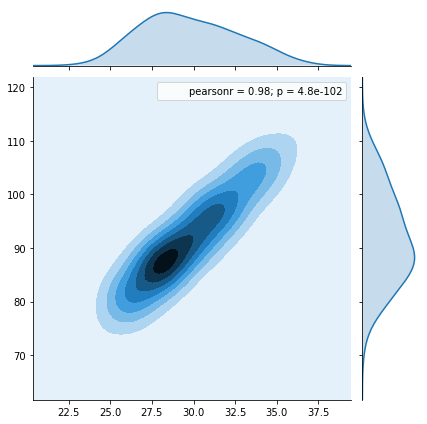

In [172]:
sns.jointplot(X, Y + jitter, kind='kde')

### Histogram

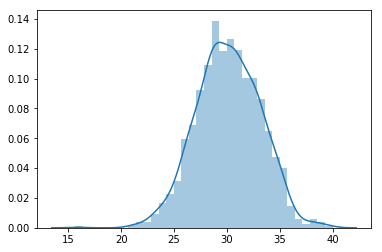

In [177]:

X = np.random.randn(1500) * 3 + 30

sns.distplot(X)

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

In [183]:
houses = pd.read_csv('../data/housing.csv')
houses.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6817,-118.08,34.08,38.0,1889.0,407.0,1330.0,396.0,3.9219,205200.0,<1H OCEAN
7370,-118.22,33.97,43.0,381.0,67.0,259.0,60.0,3.0313,166100.0,<1H OCEAN
16237,-121.29,37.98,49.0,2501.0,565.0,1171.0,550.0,2.5043,76700.0,INLAND
64,-122.30,37.81,48.0,828.0,182.0,392.0,133.0,2.5938,73500.0,NEAR BAY
6813,-118.07,34.10,28.0,676.0,177.0,543.0,185.0,3.2361,187500.0,<1H OCEAN


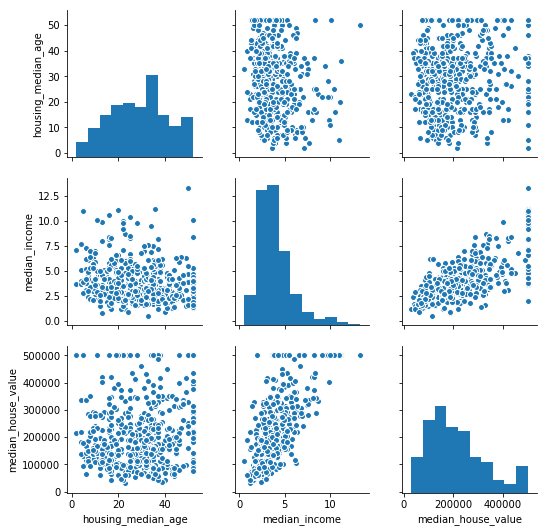

In [187]:
sns.pairplot(houses[['housing_median_age', 'median_income', 'median_house_value']].sample(500))

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

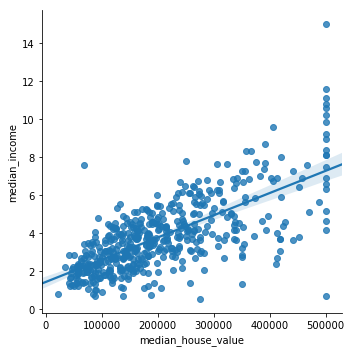

In [192]:
sns.lmplot(data=houses.sample(500), x='median_house_value',y='median_income')

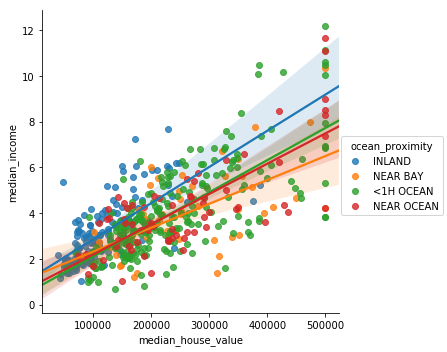

In [193]:
sns.lmplot(data=houses.sample(500), x='median_house_value',y='median_income', hue='ocean_proximity')

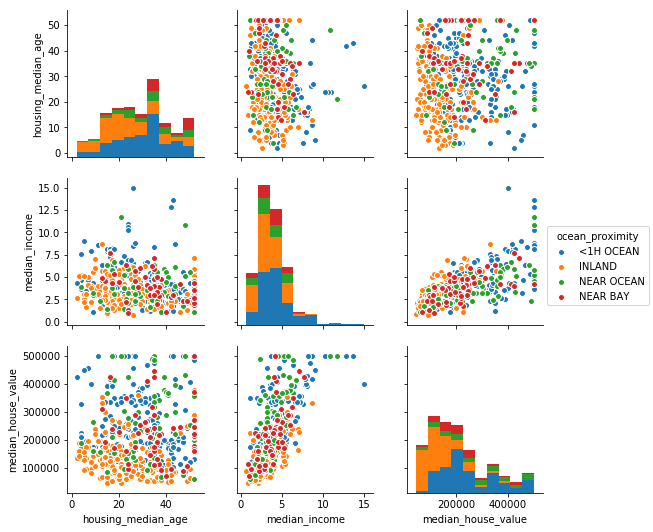

In [195]:
sns.pairplot(houses[['housing_median_age', 'median_income', 'median_house_value', 'ocean_proximity']].sample(500), hue='ocean_proximity')

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

### Swarm plot

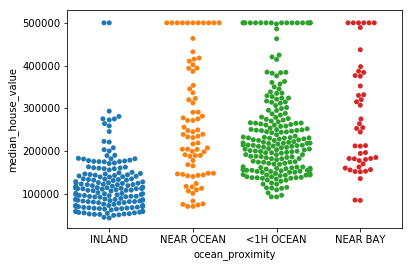

In [197]:
sns.swarmplot(data=houses.sample(500), x='ocean_proximity', y='median_house_value')

### Boxplot

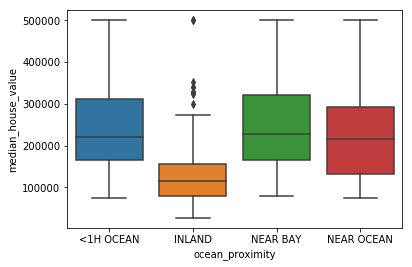

In [198]:
sns.boxplot(data=houses.sample(500), x='ocean_proximity', y='median_house_value')

### Barplot / countplot

### Pointplot

## Other types

### Heatmap

In [200]:
correlations = houses.corr()

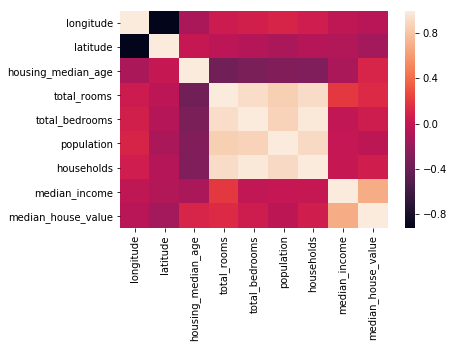

In [203]:
sns.heatmap(data=correlations)

### Clustermap

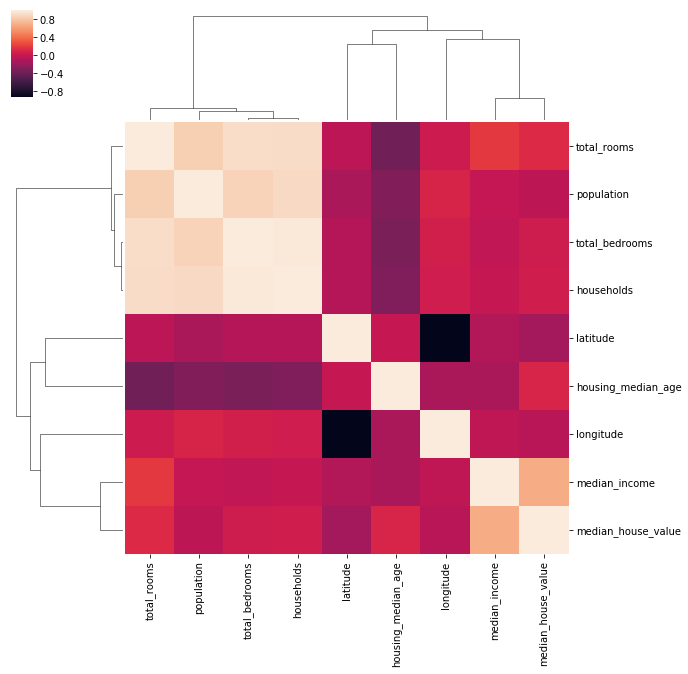

In [204]:
sns.clustermap(correlations)

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)